In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def plot_decision_boundary(func, X, y):
    min_input = min(X.min(axis=0)) - 0.1
    max_input = max(X.max(axis=0) + 0.1)
    input_range = np.linspace(min_input, max_input, 100)
    aa, bb = np.meshgrid(input_range, input_range)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)
    cm_bright = ListedColormap(['#ff0000','#009dff'])
    fig, ax = plt.subplots()
    contour = plt.contourf(aa, bb, cc, alpha=0.8)    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(min_input, max_input)
    plt.ylim(min_input, max_input)

def plot_confusion_matrix(model, X, y):
    y_pred = (model.predict(X)).argmax(axis=-1)
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', alpha=0.8, vmin=0)

In [9]:
def plot_accuracy(fit):
    plt.plot(fit.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [3]:


data = pd.read_excel('./data/DryBeanDataset/Dry_Bean_Dataset.xlsx')


In [4]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:

y = data[['Class']]
X = data.drop('Class', inplace=False, axis=1)

In [7]:
scaler = preprocessing.StandardScaler().fit(X)

X_norm = scaler.transform(X)

le = preprocessing.LabelEncoder()

y = le.fit_transform(y['Class'])




In [14]:
def cvNN(X, y):

    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cvscores = []
    for train, test in cv.split(X_norm, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(100, input_shape=(16,), activation='relu'))
        model.add(keras.layers.Dense(100, activation='relu'))
        model.add(keras.layers.Dense(100, activation='relu'))
        model.add(keras.layers.Dense(50, activation='relu'))

        model.add(keras.layers.Dense(7, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        fit = model.fit(X_norm[train], y[train], epochs=40, verbose=0)

        plot_accuracy(fit)
        

        scores = model.evaluate(X_norm[test], y[test])
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

        pred = model.predict(X_norm[test]).argmax(axis=-1)

    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


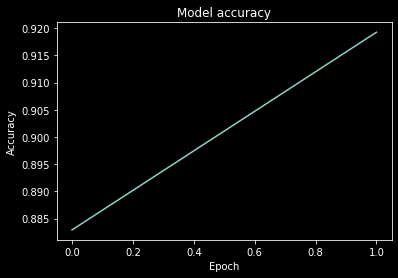

43/43 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9112
accuracy: 91.12%


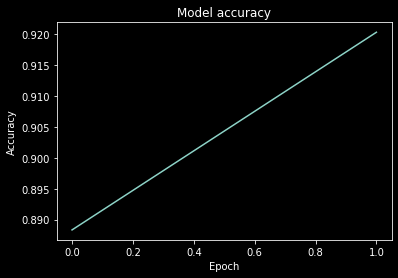

43/43 [==============================] - 1s 5ms/step - loss: 0.2595 - accuracy: 0.9089
accuracy: 90.89%


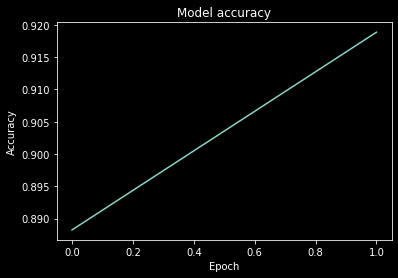

43/43 [==============================] - 0s 6ms/step - loss: 0.2442 - accuracy: 0.9243
accuracy: 92.43%


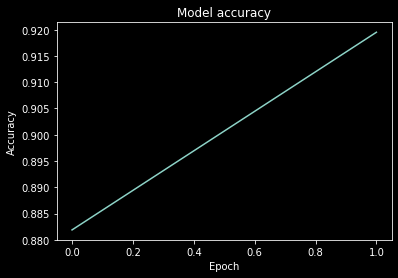

43/43 [==============================] - 1s 5ms/step - loss: 0.1916 - accuracy: 0.9339
accuracy: 93.39%


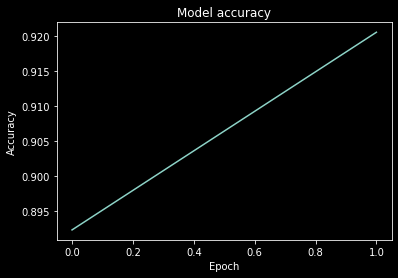

43/43 [==============================] - 1s 8ms/step - loss: 0.2458 - accuracy: 0.9118
accuracy: 91.18%


KeyboardInterrupt: 

In [12]:
cvNN(X_norm, y)

In [ ]:
cvNN(X, y)

In [11]:
history = model.fit(X, y, verbose=0, epochs=100)
history_norm = model.fit(X_norm, y, verbose=0, epochs=100)

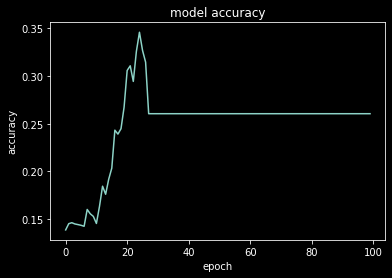

In [12]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

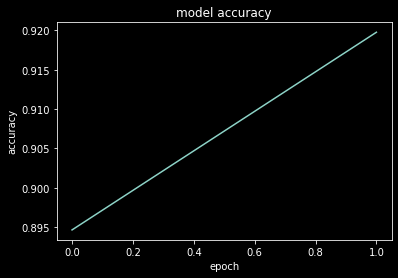

In [13]:
plt.plot(fit.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()